# Chapter 4

Model with portfolio choice between holding cash and bills. 

In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 100

import itertools
import string
import random
from types import SimpleNamespace, FunctionType
from random import gauss

from modelling import *

In [11]:
# Define SIM model
modelpc = Varspace()

# Add parameter vars
modelpc.theta = 0.2 # Tax rate
modelpc.alpha1 = 0.6 # MPC of income
modelpc.alpha2 = 0.4 # MPC of wealth

# Add coeffs
modelpc.l0 = 0.5 # Proportion of money
modelpc.l1 = 0.25
modelpc.l2 = 0.25

# Add exogenous vars
modelpc.G = TimeVar("Government exp.")
modelpc.r = TimeVar("Interest rate")

# Define equations
modelpc.addEq('Y', lambda t: C(t) + G(t))
modelpc.addEq('YD', lambda t: Y(t) - T(t) + r(t-1) * Bh(t-1))
modelpc.addEq('T', lambda t: theta * (Y(t) + r(t-1) * Bh(t-1)))
modelpc.addEq('C', lambda t: alpha1 * YD(t) + alpha2 * V(t-1))
modelpc.addEq('V', lambda t: V(t-1) + (YD(t) - C(t)))
modelpc.addEq('Bh', lambda t: V(t) * l0 + V(t) * l1 * r(t) - l2 * YD(t))
modelpc.addEq('Hh', lambda t: V(t) - Bh(t))
# modelpc.addEq('Hh', lambda t: V(t) *(1-l0) - V(t) * l1 * r(t) + l2 * YD(t))
modelpc.addEq('Bs', lambda t: (G(t) + r(t-1) * Bs(t-1)) - (T(t) + r(t-1) * Bcb(t-1)) + Bs(t-1))
modelpc.addEq('Hs', lambda t: (Bcb(t) - Bcb(t-1)) + Hs(t-1))
modelpc.addEq('Bcb', lambda t: Bs(t) - Bh(t))


# Reset vars with values
modelpc.setTime(100)
modelpc.G.setTime(100, val = 20)
modelpc.G.val[0:2] = 0
modelpc.r.setTime(100, val = .025)

# Simulate
modelpc.run(t = range(1, 100), rep=20)

Text(0.5, 0, 'Time')

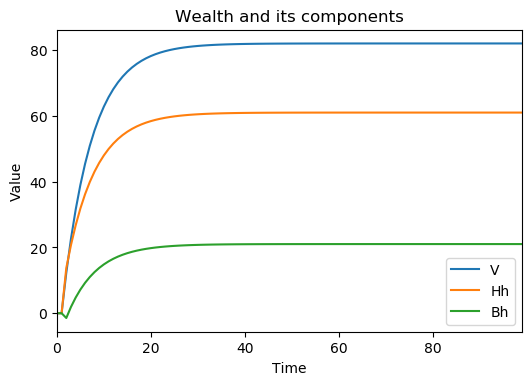

In [12]:
# Plot
pcres = pd.DataFrame.from_dict(modelpc.getRes())
pcplot = pcres[['V', 'Hh', 'Bh']].plot()
pcplot.set_title('Wealth and its components')
pcplot.set_ylabel('Value')
pcplot.set_xlabel('Time')

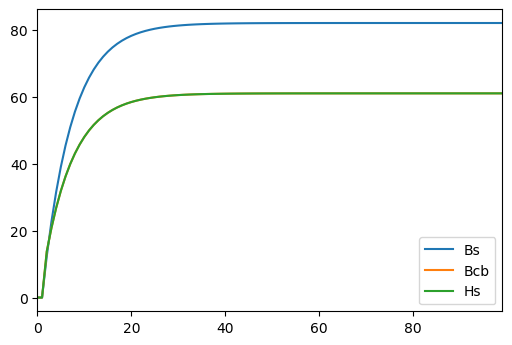

In [13]:
# Plot 
pcres[['Bs', 'Bcb', 'Hs']].plot()

Change the value of MPC out of income.

Text(0.5, 0, 'Time')

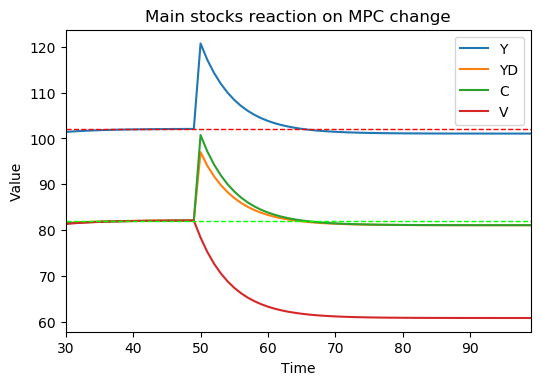

In [14]:
# Reset vars with values
# Add parameter vars
modelpc.alpha1 = 0.6 # MPC of income
modelpc.alpha2 = 0.4 # MPC of wealth

modelpc.setTime(100)
modelpc.G.setTime(100, val = 20)
modelpc.G.val[0:2] = 0
modelpc.r.setTime(100, val = .025)

# Set steady state
modelpc.run(t = range(1, 50), rep=20)

# Add change mpc
modelpc.alpha1 = 0.7 # MPC of income
# modelpc.alpha2 = 0.1 # MPC of wealth

# Run rest
modelpc.run(t = range(50, 100), rep=20)

pcres = pd.DataFrame.from_dict(modelpc.getRes())
pl = pcres[30:100][['Y', 'YD', 'C', 'V']].plot()
pl.axhline(y=pcres.loc[49, 'Y'], xmin = 0, xmax = 100, color='r', linestyle='--', lw=1)
pl.axhline(y=pcres.loc[49, 'C'], xmin = 0, xmax = 100, color='lime', linestyle='--', lw=1)
pl.set_title('Main stocks reaction on MPC change')
pl.set_ylabel('Value')
pl.set_xlabel('Time')

Add expectations to the model and shock MPC out of income

In [15]:
# Define SIM model
modelpcex = Varspace()

# Add parameter vars
modelpcex.theta = 0.2 # Tax rate
modelpcex.alpha2 = 0.4 # consumption of wealth

# Add coeffs
modelpcex.l0 = 0.5 # Proportion of money
modelpcex.l1 = 0.25
modelpcex.l2 = 0.25

# Add exogenous vars
modelpcex.G = TimeVar("Government exp.")
modelpcex.r = TimeVar("Interest rate")
modelpcex.alpha1 = TimeVar("MPC")

# Define equations
modelpcex.gauss = random.gauss
modelpcex.addEq('RAND', lambda t: gauss(0, 0.02))
modelpcex.addEq('Y', lambda t: C(t) + G(t))
modelpcex.addEq('YD', lambda t: Y(t) - T(t) + r(t-1) * Bh(t-1))
modelpcex.addEq('T', lambda t: theta * (Y(t) + r(t-1) * Bh(t-1)))
modelpcex.addEq('V', lambda t: V(t-1) + (YD(t) - C(t)))
modelpcex.addEq('C', lambda t: alpha1(t) * YDe(t) + alpha2 * V(t-1))
modelpcex.addEq('Bd', lambda t: Ve(t) * l0 + V(t) * l1 * r(t) - l2 * YDe(t))
modelpcex.addEq('Hd', lambda t: Ve(t) - Bd(t))
modelpcex.addEq('Ve', lambda t: V(t-1) + YDe(t) - C(t))
modelpcex.addEq('Hh', lambda t: V(t) - Bh(t))
modelpcex.addEq('Bh', lambda t: Bd(t))
modelpcex.addEq('Bs', lambda t: (G(t) + r(t-1) * Bs(t-1)) - (T(t) + r(t-1) * Bcb(t-1)) + Bs(t-1))
modelpcex.addEq('Hs', lambda t: (Bcb(t) - Bcb(t-1)) + Hs(t-1))
modelpcex.addEq('Bcb', lambda t: Bs(t) - Bh(t))
modelpcex.addEq('YDe', lambda t: YD(t) * (1 + RAND(t)))

# Reset vars with values
nPeriods = 200
modelpcex.setTime(nPeriods)
modelpcex.G.setTime(nPeriods, val = 20)
modelpcex.G.val[0:2] = 0
modelpcex.r.setTime(nPeriods, val = .025)
modelpcex.alpha1.setTime(nPeriods, val = .6)
modelpcex.alpha1.val[100:nPeriods] = .7


# Simulate
modelpcex.run(t = range(1, nPeriods), rep=20)

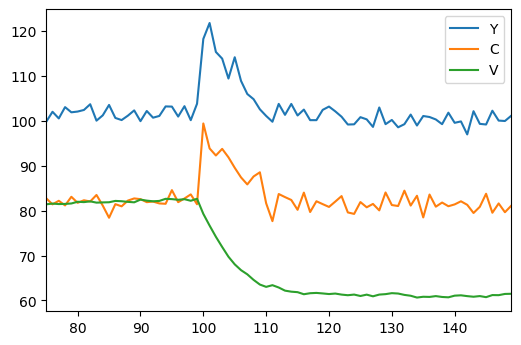

In [16]:
pcexres = pd.DataFrame.from_dict(modelpcex.getRes())
pcexres[75:150][['Y', 'C', 'V']].plot()

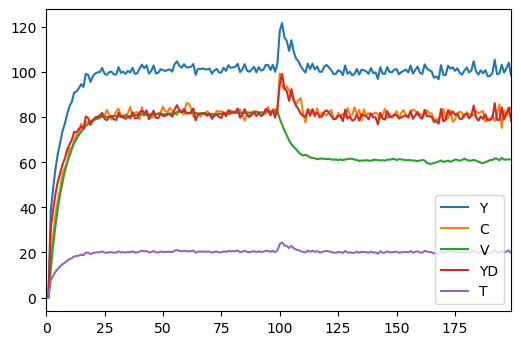

In [17]:
pcexres[['Y', 'C', 'V', 'YD', 'T']].plot()

Text(0.5, 0, 'Time')

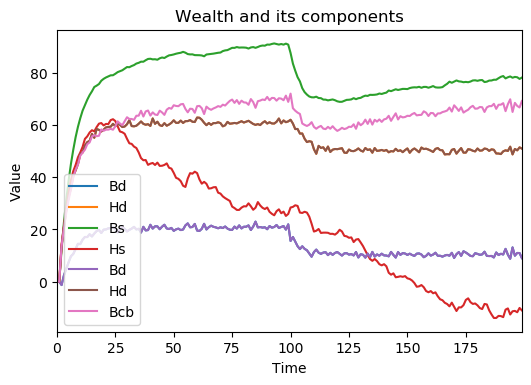

In [18]:
exV = pcexres[['Bd', 'Hd', 'Bs', 'Hs', 'Bd', 'Hd', 'Bcb']].plot()
exV.set_title('Wealth and its components')
exV.set_ylabel('Value')
exV.set_xlabel('Time')